In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

import calendar
from datetime import datetime

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
sns.set(style="whitegrid")

In [3]:
dfZP = pd.read_csv('../data/train.csv')

# Definición de funciones y nuevas columnas a utilizar

## Columna cantidad total de Amenities

In [4]:
dfZP['cantidad_amenities'] = dfZP['gimnasio'] + dfZP['piscina'] + dfZP['usosmultiples']

In [5]:
dfZP['cantidad_cercanos'] = dfZP['escuelascercanas'] + dfZP['centroscomercialescercanos']

In [6]:
dfZP['year'] = pd.DatetimeIndex(dfZP['fecha']).year

## Función porcentaje

In [7]:
def porcentaje(x):
    return round(x.mean() * 100, 2)

# A continuación se hará un análisis con respecto a los Amenities y a otras características de las propiedades en venta	

## Amenities

### Gimnasio

Primero vamos a ver la cantidad de nulos que tiene la columna.

In [8]:
dfZP['gimnasio'].isnull().sum()

0

Luego observamos los distintos valores que tiene la columna ***Gimnasio*** en nuestro DataFrame.

In [9]:
dfZP['gimnasio'].value_counts()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

Como los valores posibles son 0 y 1, podemos convertir dicha columna a tipo booleano.
Podemos ver que a los valores que antes tenían 0 como valor, ahora son *Falsos*, mientras que es *True* si anteriormente el valor era 1.

In [10]:
dfZP['gimnasio'] = dfZP['gimnasio'].astype(bool)

In [11]:
dfZP['gimnasio'].value_counts()

False    225006
True      14994
Name: gimnasio, dtype: int64

#### Cantidad de publicaciones

En un primer momento, vemos que hay una diferencia bastante considerable entre aquellas publicaciones que cuentan con gimnasio y cuales no. 
Más del 90% de las propiedades que se encuentran publicadas no poseen gimnasio.

In [12]:
serie_publicacion_per_gimnasio = dfZP['gimnasio'].value_counts()
df_publicacion_per_gimnasio = serie_publicacion_per_gimnasio.reset_index()
df_publicacion_per_gimnasio.rename(columns={'index': 'gimnasio','gimnasio': 'total'}, inplace=True)
df_publicacion_per_gimnasio

,gimnasio,total
0,False,225006
1,True,14994


In [13]:
df_publicacion_per_gimnasio['gimnasio'] = df_publicacion_per_gimnasio['gimnasio'].\
    map({False: 'sin gimnasio',True: 'con gimnasio'})
df_publicacion_per_gimnasio

,gimnasio,total
0,sin gimnasio,225006
1,con gimnasio,14994


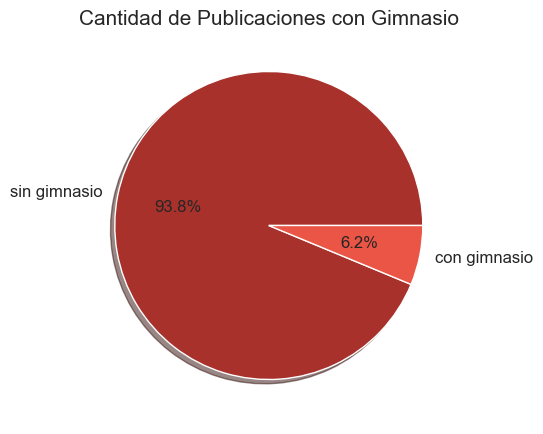

In [14]:
paired_colors = sns.color_palette("Reds_d",2)

fig, ax = plt.subplots(figsize=(8, 5))

plt.pie(df_publicacion_per_gimnasio['total'], textprops={'fontsize': 12}, \
        colors=paired_colors, labels=df_publicacion_per_gimnasio['gimnasio'], \
        autopct='%1.1f%%', counterclock=True, shadow=True)
plt.title('Cantidad de Publicaciones con Gimnasio', fontsize=15)
plt.show()

#### Precio promedio

Ahora vamos a analizar como varía el precio de la propiedad según si cuentan con un espacio para realizar ejercicio.

In [15]:
avgprecio_per_gimnasio = dfZP.groupby('gimnasio').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_gimnasio

precio                      
                  mean         max       min
gimnasio                                    
False     2.445322e+06  12525000.0  310000.0
True      3.814127e+06  12515000.0  310000.0

Tanto en la tabla anterior como en el gráfico que se encuentra a continuación, podemos ver que, en promedio, aquellas propiedades que poseen gimnasio cuestan más. 
Siendo una diferencia de más de 1.000.000 de pesos mexicanos.

In [16]:
avg_por_anio_gimnasio = dfZP.groupby(['gimnasio', 'year']).agg({'precio': 'mean', 'id': np.size}).reset_index()
avg_por_anio_gimnasio.rename(columns={'id': 'cantidad', 'year': 'Año', 'precio': 'Precio promedio'}, inplace=True)
avg_por_anio_gimnasio = avg_por_anio_gimnasio.loc[avg_por_anio_gimnasio['cantidad'] >= 10]
avg_por_anio_gimnasio['gimnasio'] = avg_por_anio_gimnasio['gimnasio'].\
    map({False: 'Sin gimnasio', True: 'Con gimnasio'})

avg_por_anio_gimnasio

,gimnasio,Año,Precio promedio,cantidad
0,Sin gimnasio,2012,1.989806e+06,22537
1,Sin gimnasio,2013,2.061731e+06,29059
2,Sin gimnasio,2014,2.299970e+06,38635
3,Sin gimnasio,2015,2.550345e+06,49024
4,Sin gimnasio,2016,2.700477e+06,85751
5,Con gimnasio,2012,2.997996e+06,997
6,Con gimnasio,2013,3.511889e+06,1327
7,Con gimnasio,2014,3.653583e+06,1937
8,Con gimnasio,2015,4.322650e+06,2446
9,Con gimnasio,2016,3.848142e+06,8287


Text(0.5, 0.98, 'Precio promedio por año')

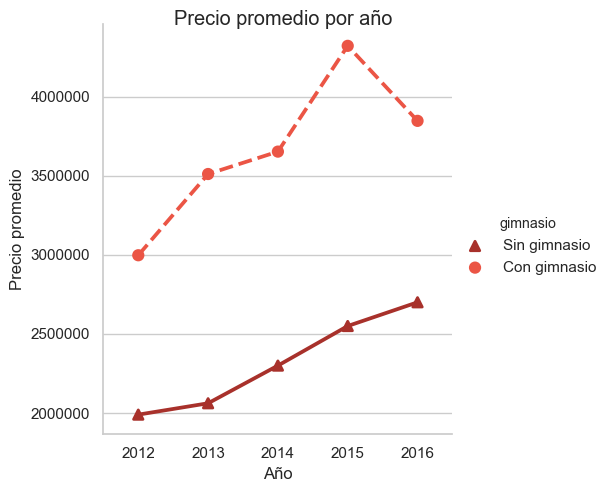

In [17]:
g = sns.catplot(x="Año", y="Precio promedio", hue="gimnasio", palette=sns.color_palette("Reds_d",2),
                markers=["^", "o"], linestyles=["-", "--"], kind="point", data=avg_por_anio_gimnasio);
g.fig.suptitle('Precio promedio por año')
# {'Sin gimnasio': "g", 'Con gimnasio': "m"}

#### Tipo de Propiedad

In [18]:
per_gimnasio = dfZP.loc[dfZP['gimnasio'] == True]
per_gimnasio['tipodepropiedad'].value_counts()

Apartamento                7591
Casa                       6105
Casa en condominio         1262
Departamento Compartido      34
Oficina comercial             1
Terreno                       1
Name: tipodepropiedad, dtype: int64

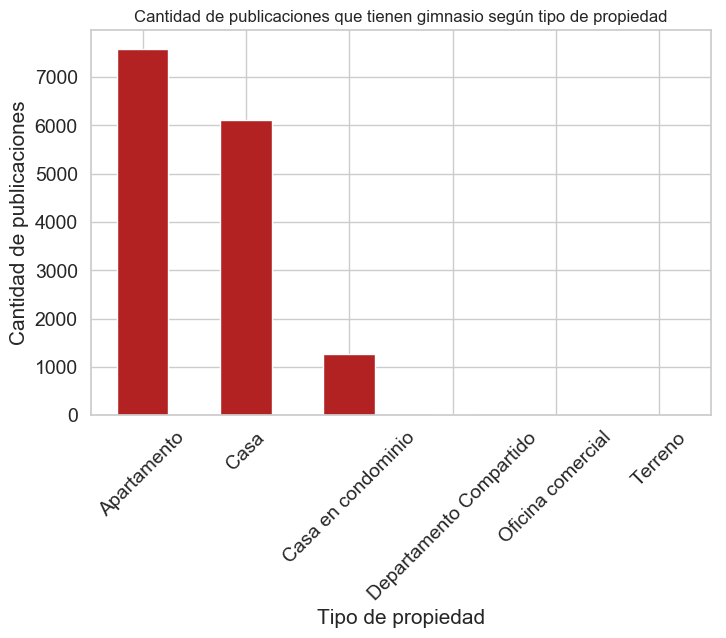

In [19]:
#g = sns.barplot(y=per_gimnasio['tipodepropiedad'].value_counts().values, x=per_gimnasio['tipodepropiedad'].value_counts().index, \
#                palette=sns.color_palette("Reds_d"));

#g.set_title('Cantidad de publicaciones que tienen gimnasio según tipo de propiedad', fontsize=15);
#g.set_xlabel('Tipo de propiedad');
#g.set_ylabel('Cantidad de publicaciones');

per_gimnasio['tipodepropiedad'].value_counts().plot(kind='bar',figsize=(8,5),fontsize=14,rot=45, color='firebrick')
plt.title('Cantidad de publicaciones que tienen gimnasio según tipo de propiedad')
plt.ylabel("Cantidad de publicaciones", size=15)
plt.xlabel("Tipo de propiedad", size=15)
plt.show()


In [20]:
per_no_gimnasio = dfZP.loc[dfZP['gimnasio'] == False]
per_no_gimnasio['tipodepropiedad'].value_counts()

Casa                             135612
Apartamento                       49750
Casa en condominio                18035
Terreno                            9944
Local Comercial                    3055
Oficina comercial                  1740
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Otros                               134
Departamento Compartido             107
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [21]:
porcentaje_gimnasio_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'gimnasio' : porcentaje}).reset_index()
porcentaje_gimnasio_gb_tipo

,tipodepropiedad,gimnasio
0,Apartamento,13.24
1,Bodega comercial,0.00
2,Casa,4.31
3,Casa en condominio,6.54
4,Casa uso de suelo,0.00
5,Departamento Compartido,24.11
6,Duplex,0.00
7,Edificio,0.00
8,Garage,0.00
9,Hospedaje,0.00


In [22]:
porcentaje_gimnasio_mayor_a_1 = porcentaje_gimnasio_gb_tipo.loc[porcentaje_gimnasio_gb_tipo['gimnasio'] > 1].\
                                sort_values(['gimnasio'], ascending=[False])
porcentaje_gimnasio_mayor_a_1

,tipodepropiedad,gimnasio
5,Departamento Compartido,24.11
0,Apartamento,13.24
3,Casa en condominio,6.54
2,Casa,4.31


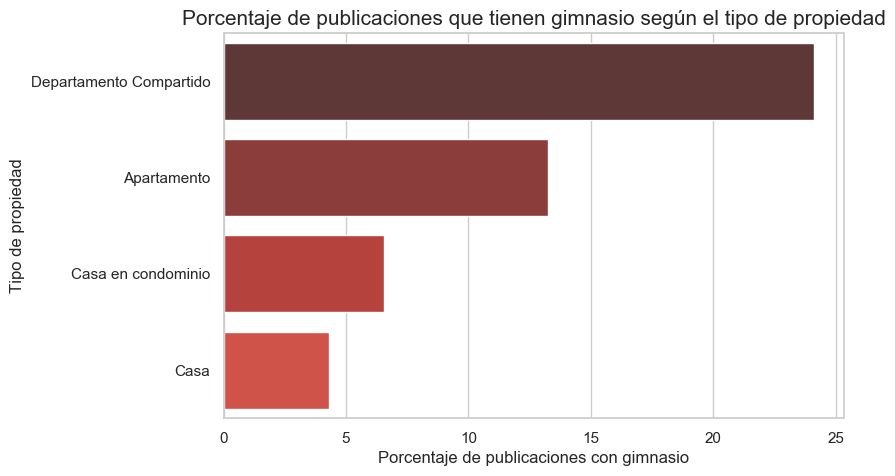

In [23]:
g = sns.barplot(x=porcentaje_gimnasio_mayor_a_1['gimnasio'], y=porcentaje_gimnasio_mayor_a_1['tipodepropiedad'], \
                palette=sns.color_palette("Reds_d"));

g.set_title('Porcentaje de publicaciones que tienen gimnasio según el tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Porcentaje de publicaciones con gimnasio');

#### Ciudad

In [24]:
per_gimnasio['ciudad'].value_counts()

Huixquilucan                       1571
Alvaro Obregón                      945
Miguel Hidalgo                      876
Zapopan                             726
Cuajimalpa de Morelos               711
Querétaro                           690
Mérida                              630
Benito Juárez                       623
San Andrés Cholula                  469
Monterrey                           447
Cancún                              435
Acapulco de Juárez                  428
Cuauhtémoc                          404
Naucalpan de Juárez                 365
Tlajomulco de Zúñiga                303
Atizapán de Zaragoza                288
Coyoacán                            236
Guadalajara                         234
Tlalpan                             226
Metepec                             215
Cuernavaca                          198
San Luis Potosí                     176
Puebla                              158
San Pedro Garza García              157
Corregidora                         122


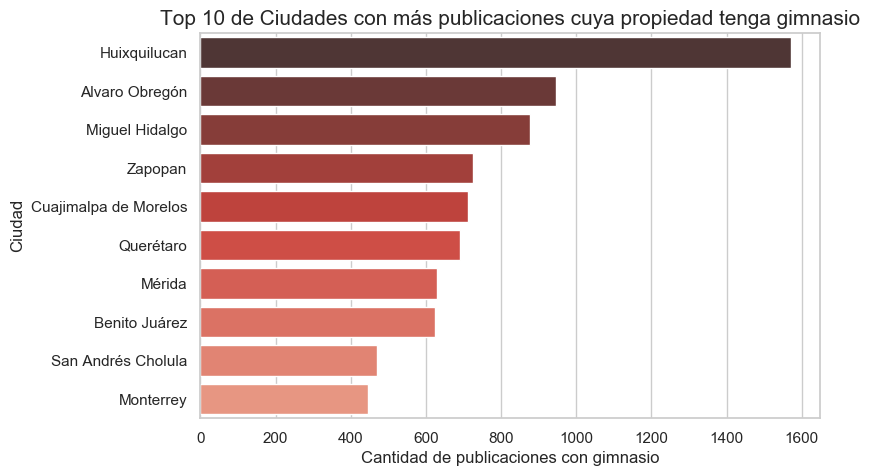

In [25]:
g = sns.barplot(y=per_gimnasio['ciudad'].value_counts().head(10).index, x=per_gimnasio['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones cuya propiedad tenga gimnasio', fontsize=15);
g.set_xlabel('Cantidad de publicaciones con gimnasio');
g.set_ylabel('Ciudad');

In [26]:
porcentaje_gimnasio_gb_ciudad = dfZP.groupby('ciudad').agg({'gimnasio' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_gimnasio_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_gimnasio_gb_ciudad.columns.get_level_values(1)
porcentaje_gimnasio_gb_ciudad.columns = level0 + '_' + level1
porcentaje_gimnasio_gb_ciudad_top10 =porcentaje_gimnasio_gb_ciudad.loc[porcentaje_gimnasio_gb_ciudad['gimnasio_sum'] >= 10].\
    sort_values(['gimnasio_porcentaje'], ascending=[False]).head(10)
porcentaje_gimnasio_gb_ciudad_top10

,ciudad_,gimnasio_porcentaje,gimnasio_sum
427,Monclova,29.41,10.0
310,Huixquilucan,27.47,1571.0
206,Cuajimalpa de Morelos,23.54,711.0
858,Zihuatanejo de Azueta,19.44,28.0
6,Acapulco de Juárez,17.44,428.0
417,Miguel Hidalgo,15.12,876.0
37,Alvaro Obregón,14.25,945.0
555,San Andrés Cholula,12.33,469.0
380,Lerma,11.76,54.0
36,Alvarado,11.60,108.0


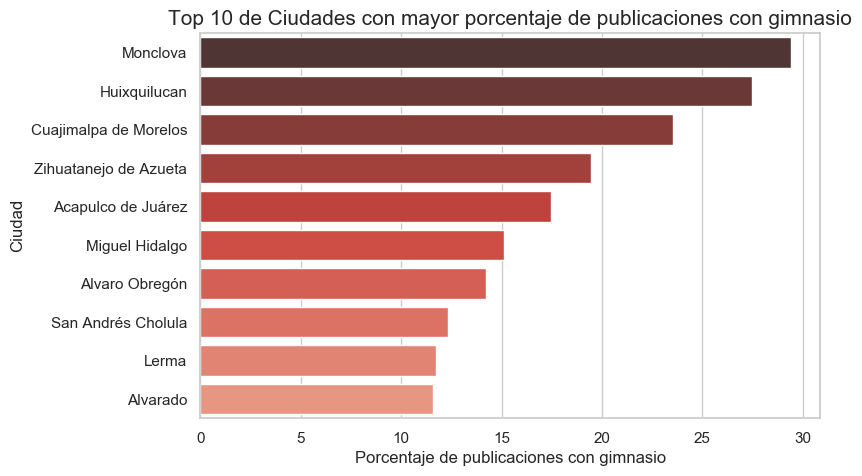

In [27]:
g = sns.barplot(y=porcentaje_gimnasio_gb_ciudad_top10['ciudad_'], x=porcentaje_gimnasio_gb_ciudad_top10['gimnasio_porcentaje'], \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones con gimnasio', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones con gimnasio');
g.set_ylabel('Ciudad');

#### Antiguedad

In [28]:
gimnasio_antiguedad = dfZP.dropna(subset=['antiguedad']).pivot_table(index='antiguedad', columns='gimnasio', values='precio', aggfunc=np.size)
gimnasio_antiguedad.fillna({True: 0, False: 0}, inplace=True)
gimnasio_antiguedad

gimnasio,False,True
antiguedad,,
0.0,45935.0,4400.0
1.0,11042.0,1311.0
2.0,4443.0,616.0
3.0,4915.0,701.0
4.0,7009.0,935.0
5.0,30449.0,2819.0
6.0,2889.0,280.0
7.0,1948.0,98.0
8.0,2333.0,85.0


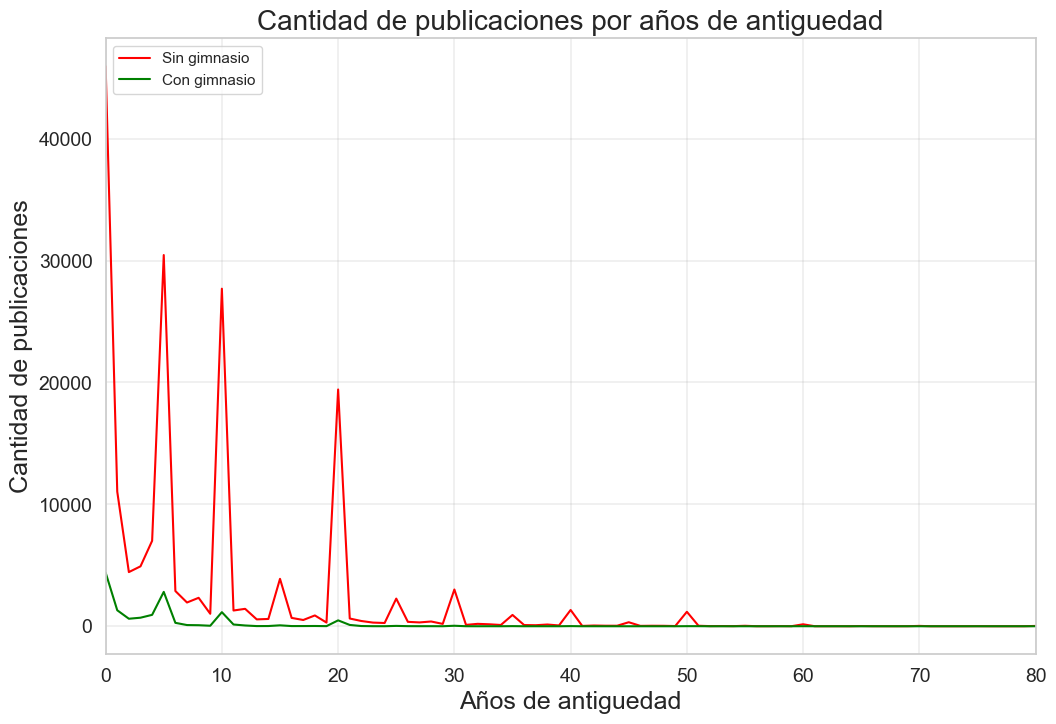

In [29]:
gimnasio_antiguedad.plot(rot=0,figsize=(12,8),color=['Red','Green'], fontsize=14,x_compat=True)
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Cantidad de publicaciones por años de antiguedad',fontsize=20);
plt.ylabel('Cantidad de publicaciones',fontsize=18);
plt.xlabel('Años de antiguedad',fontsize=18);
plt.legend(['Sin gimnasio', 'Con gimnasio'], loc='upper left');

plt.show()

### Piscina

In [30]:
dfZP['piscina'].isnull().sum()

0

In [31]:
dfZP['piscina'].value_counts()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [32]:
dfZP['piscina'] = dfZP['piscina'].astype(bool)
dfZP['piscina'].value_counts()

False    219028
True      20972
Name: piscina, dtype: int64

#### Cantidad de publicaciones

In [33]:
serie_publicacion_per_piscina = dfZP['piscina'].value_counts()
df_publicacion_per_piscina = serie_publicacion_per_piscina.reset_index()
df_publicacion_per_piscina.rename(columns={'index': 'piscina','piscina': 'total'}, inplace=True)
df_publicacion_per_piscina

,piscina,total
0,False,219028
1,True,20972


In [34]:
df_publicacion_per_piscina['piscina'] = df_publicacion_per_piscina['piscina'].\
    map({False: 'sin piscina',True: 'con piscina'})
df_publicacion_per_piscina

,piscina,total
0,sin piscina,219028
1,con piscina,20972


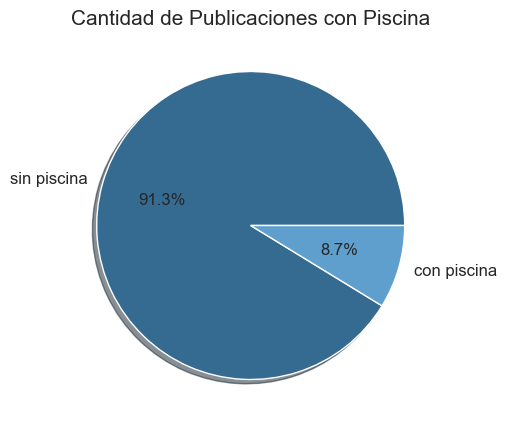

In [35]:
paired_colors = sns.color_palette("Blues_d",2)

fig, ax = plt.subplots(figsize=(8, 5))

plt.pie(df_publicacion_per_piscina['total'], textprops={'fontsize': 12}, \
        colors=paired_colors, labels=df_publicacion_per_piscina['piscina'], \
        autopct='%1.1f%%', counterclock=True, shadow=True)
plt.title('Cantidad de Publicaciones con Piscina', fontsize=15)
plt.show()

#### Precio promedio

In [36]:
avgprecio_per_piscina = dfZP.groupby('piscina').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_piscina

precio                      
                 mean         max       min
piscina                                    
False    2.455764e+06  12525000.0  310000.0
True     3.314903e+06  12500000.0  310000.0

In [37]:
avg_por_anio_piscina = dfZP.groupby(['piscina', 'year']).agg({'precio': 'mean', 'id': np.size}).reset_index()
avg_por_anio_piscina.rename(columns={'id': 'cantidad', 'year': 'Año', 'precio': 'Precio promedio'}, inplace=True)
avg_por_anio_piscina = avg_por_anio_piscina.loc[avg_por_anio_piscina['cantidad'] >= 10]
avg_por_anio_piscina['piscina'] = avg_por_anio_piscina['piscina'].\
    map({False: 'Sin piscina', True: 'Con piscina'})

avg_por_anio_piscina

,piscina,Año,Precio promedio,cantidad
0,Sin piscina,2012,1.958237e+06,20871
1,Sin piscina,2013,2.059477e+06,27570
2,Sin piscina,2014,2.309276e+06,37620
3,Sin piscina,2015,2.576429e+06,48019
4,Sin piscina,2016,2.703281e+06,84948
5,Con piscina,2012,2.614681e+06,2663
6,Con piscina,2013,2.767157e+06,2816
7,Con piscina,2014,3.069564e+06,2952
8,Con piscina,2015,3.443563e+06,3451
9,Con piscina,2016,3.720555e+06,9090


Text(0.5, 0.98, 'Precio promedio por año')

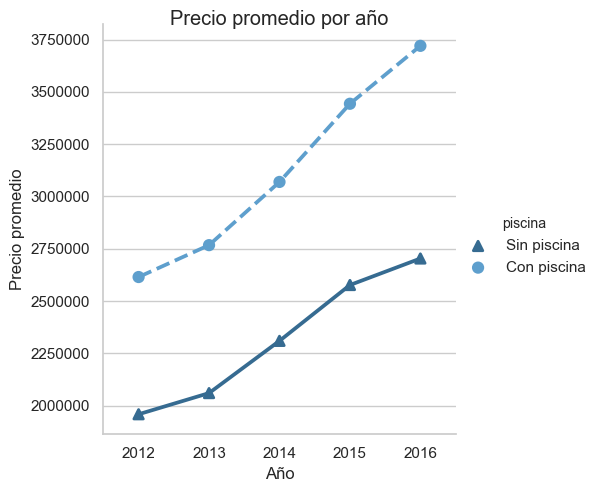

In [38]:
g = sns.catplot(x="Año", y="Precio promedio", hue="piscina", palette=sns.color_palette("Blues_d",2),
                markers=["^", "o"], linestyles=["-", "--"], kind="point", data=avg_por_anio_piscina);
g.fig.suptitle('Precio promedio por año')

#### Tipo de Propiedad

In [39]:
per_piscina = dfZP.loc[dfZP['piscina'] == True]
per_piscina['tipodepropiedad'].value_counts()

Casa                       9109
Apartamento                8095
Casa en condominio         2973
Terreno                     489
Villa                       145
Quinta Vacacional           116
Departamento Compartido      26
Rancho                       14
Terreno comercial             2
Oficina comercial             1
Edificio                      1
Name: tipodepropiedad, dtype: int64

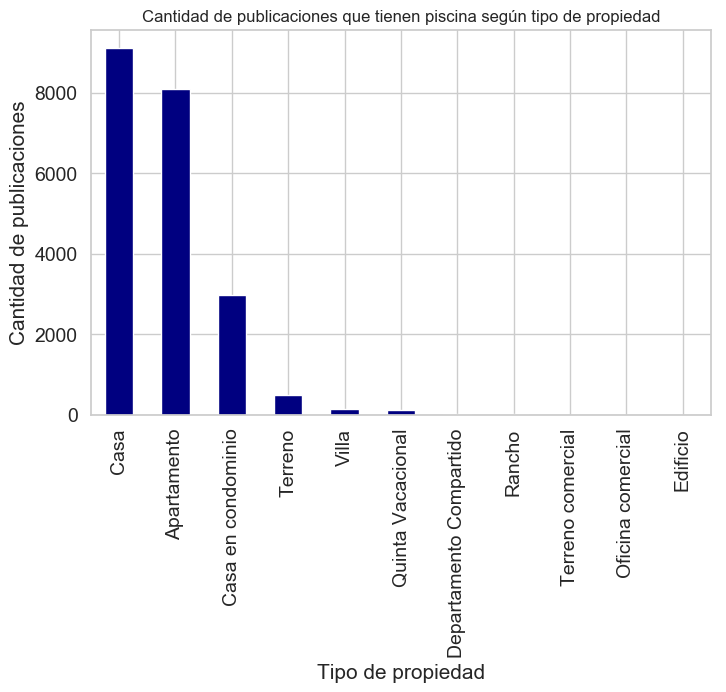

In [40]:
per_piscina['tipodepropiedad'].value_counts().plot(kind='bar',figsize=(8,5),fontsize=14,rot=90, color='navy')
plt.title('Cantidad de publicaciones que tienen piscina según tipo de propiedad')
plt.ylabel("Cantidad de publicaciones", size=15)
plt.xlabel("Tipo de propiedad", size=15)
plt.show()

In [41]:
porcentaje_piscina_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'piscina' : porcentaje}).reset_index()
porcentaje_piscina_gb_tipo

,tipodepropiedad,piscina
0,Apartamento,14.12
1,Bodega comercial,0.00
2,Casa,6.43
3,Casa en condominio,15.41
4,Casa uso de suelo,0.00
5,Departamento Compartido,18.44
6,Duplex,0.00
7,Edificio,0.07
8,Garage,0.00
9,Hospedaje,0.00


In [42]:
porcentaje_piscina_tipo_mayor_a_1 = porcentaje_piscina_gb_tipo.loc[porcentaje_piscina_gb_tipo['piscina'] > 1]
porcentaje_piscina_tipo_mayor_a_1 = porcentaje_piscina_tipo_mayor_a_1.sort_values(['piscina'], ascending=[False])
porcentaje_piscina_tipo_mayor_a_1

,tipodepropiedad,piscina
23,Villa,42.65
18,Quinta Vacacional,29.37
5,Departamento Compartido,18.44
3,Casa en condominio,15.41
0,Apartamento,14.12
19,Rancho,8.24
2,Casa,6.43
20,Terreno,4.92


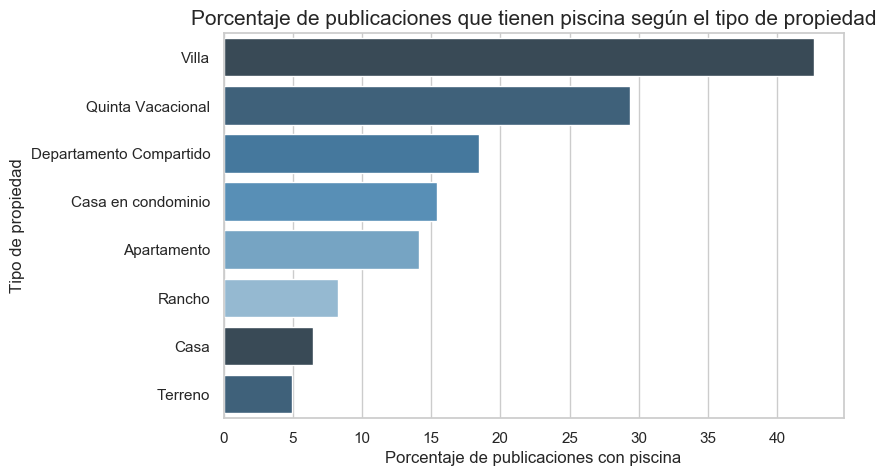

In [43]:
g = sns.barplot(x=porcentaje_piscina_tipo_mayor_a_1['piscina'], y=porcentaje_piscina_tipo_mayor_a_1['tipodepropiedad'], \
                palette=sns.color_palette("Blues_d"));

g.set_title('Porcentaje de publicaciones que tienen piscina según el tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Porcentaje de publicaciones con piscina');

#### Ciudad

In [44]:
per_piscina['ciudad'].value_counts()

Mérida                       1728
Huixquilucan                 1554
Acapulco de Juárez           1417
Querétaro                    1395
Cancún                       1362
Cuernavaca                   1202
Zapopan                      1165
Alvaro Obregón                688
Tlajomulco de Zúñiga          674
Miguel Hidalgo                609
Cuajimalpa de Morelos         547
Monterrey                     405
Yautepec                      361
Temixco                       353
Corregidora                   326
Guadalajara                   263
Puerto Vallarta               258
Emiliano Zapata               257
Benito Juárez                 257
Jiutepec                      224
San Pedro Garza García        223
Bahía de Banderas             218
Boca del Río                  209
Cuauhtémoc                    203
Atizapán de Zaragoza          202
San Andrés Cholula            199
Atlatlahucan                  196
Alvarado                      192
Playa del Carmen              176
Xochitepec    

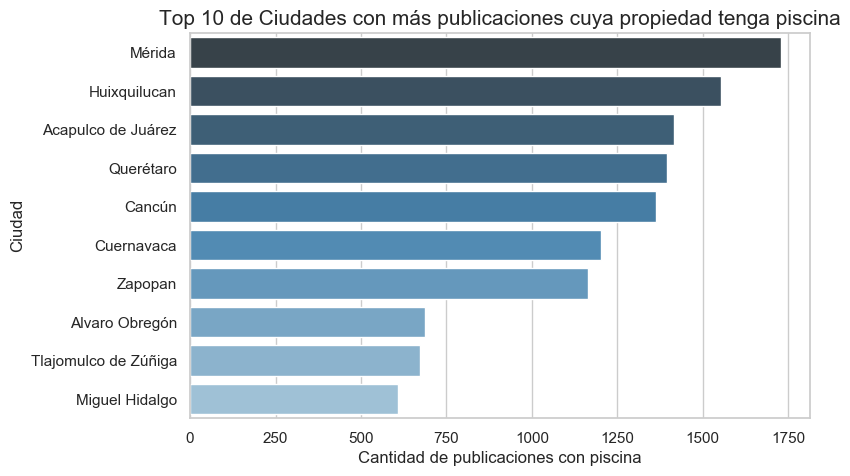

In [45]:
g = sns.barplot(y=per_piscina['ciudad'].value_counts().head(10).index, x=per_piscina['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Blues_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones cuya propiedad tenga piscina', fontsize=15);
g.set_xlabel('Cantidad de publicaciones con piscina');
g.set_ylabel('Ciudad');

In [46]:
porcentaje_piscina_gb_ciudad = dfZP.groupby('ciudad').agg({'piscina' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_piscina_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_piscina_gb_ciudad.columns.get_level_values(1)
porcentaje_piscina_gb_ciudad.columns = level0 + '_' + level1
porcentaje_piscina_gb_ciudad_top10 = porcentaje_piscina_gb_ciudad.loc[porcentaje_piscina_gb_ciudad['piscina_sum'] >= 10].\
    sort_values(['piscina_porcentaje'], ascending=[False]).head(10)
porcentaje_piscina_gb_ciudad_top10

,ciudad_,piscina_porcentaje,piscina_sum
74,Atlatlahucan,67.82,196.0
858,Zihuatanejo de Azueta,59.03,85.0
832,Xochitepec,58.70,172.0
837,Yautepec,58.51,361.0
6,Acapulco de Juárez,57.74,1417.0
760,Tlayacapan,56.76,42.0
691,Temixco,54.22,353.0
693,Temozón,52.38,11.0
84,Ayala,51.35,38.0
249,Emiliano Zapata,50.10,257.0


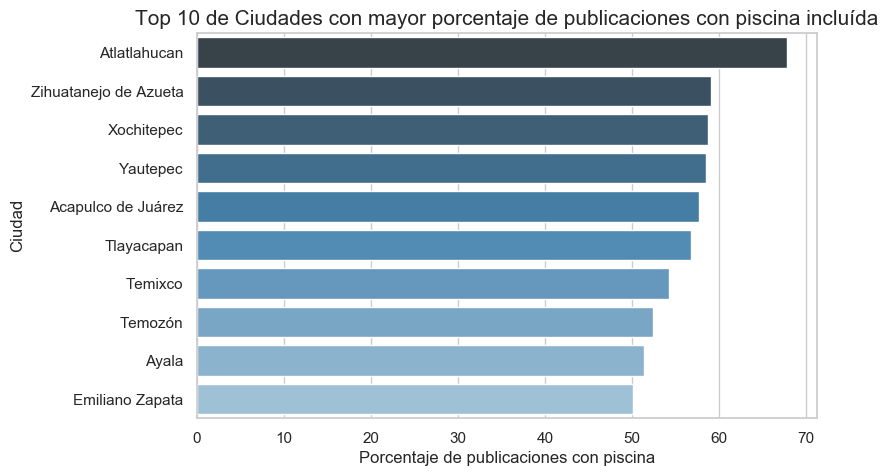

In [47]:
g = sns.barplot(y=porcentaje_piscina_gb_ciudad_top10['ciudad_'], x=porcentaje_piscina_gb_ciudad_top10['piscina_porcentaje'], \
                palette=sns.color_palette("Blues_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones con piscina incluída', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones con piscina');
g.set_ylabel('Ciudad');

#### Antiguedad

In [48]:
piscina_antiguedad = dfZP.dropna(subset=['antiguedad']).pivot_table(index='antiguedad', columns='piscina', values='precio', aggfunc=np.size)
piscina_antiguedad.fillna({True: 0, False: 0}, inplace=True)
piscina_antiguedad

piscina,False,True
antiguedad,,
0.0,43652.0,6683.0
1.0,10379.0,1974.0
2.0,4155.0,904.0
3.0,4603.0,1013.0
4.0,6648.0,1296.0
5.0,29565.0,3703.0
6.0,2870.0,299.0
7.0,1875.0,171.0
8.0,2244.0,174.0


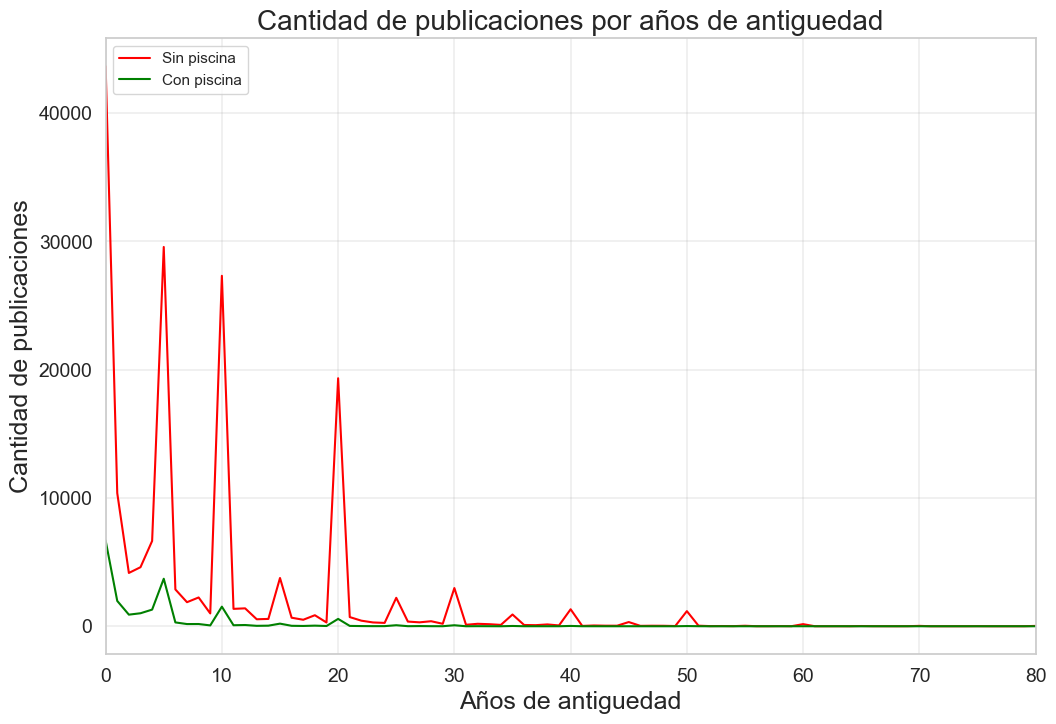

In [49]:
piscina_antiguedad.plot(rot=0,figsize=(12,8),color=['Red','Green'], fontsize=14,x_compat=True)
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Cantidad de publicaciones por años de antiguedad',fontsize=20);
plt.ylabel('Cantidad de publicaciones',fontsize=18);
plt.xlabel('Años de antiguedad',fontsize=18);
plt.legend(['Sin piscina', 'Con piscina'], loc='upper left');

plt.show()

### Usos Múltiples

In [50]:
dfZP['usosmultiples'].isnull().sum()

0

In [51]:
dfZP['usosmultiples'].value_counts()

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [52]:
dfZP['usosmultiples'] = dfZP['usosmultiples'].astype(bool)
dfZP['usosmultiples'].value_counts()

False    226778
True      13222
Name: usosmultiples, dtype: int64

#### Cantidad de publicaciones

In [53]:
serie_publicacion_per_SUM = dfZP['usosmultiples'].value_counts()
df_publicacion_per_SUM = serie_publicacion_per_SUM.reset_index()
df_publicacion_per_SUM.rename(columns={'index': 'SUM','usosmultiples': 'total'}, inplace=True)
df_publicacion_per_SUM

,SUM,total
0,False,226778
1,True,13222


In [54]:
df_publicacion_per_SUM['SUM'] = df_publicacion_per_SUM['SUM'].\
    map({False: 'sin SUM',True: 'con SUM'})
df_publicacion_per_SUM

,SUM,total
0,sin SUM,226778
1,con SUM,13222


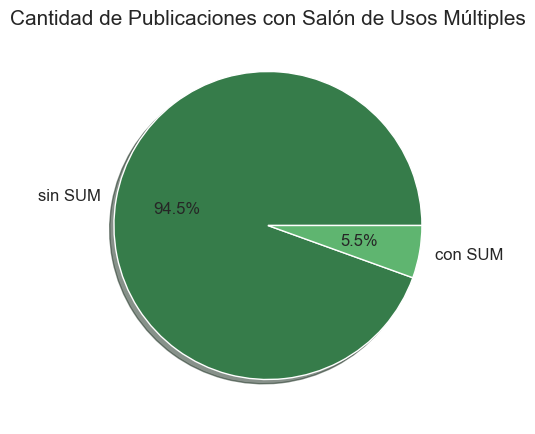

In [55]:
paired_colors = sns.color_palette("Greens_d",2)

fig, ax = plt.subplots(figsize=(8, 5))

plt.pie(df_publicacion_per_SUM['total'], textprops={'fontsize': 12}, \
        colors=paired_colors, labels=df_publicacion_per_SUM['SUM'], \
        autopct='%1.1f%%', counterclock=True, shadow=True)
plt.title('Cantidad de Publicaciones con Salón de Usos Múltiples', fontsize=15)
plt.show()

#### Precio promedio

In [56]:
avgprecio_per_SUM = dfZP.groupby('usosmultiples').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_SUM

precio                      
                       mean         max       min
usosmultiples                                    
False          2.455262e+06  12525000.0  310000.0
True           3.827091e+06  12500000.0  310000.0

In [57]:
avg_por_anio_SUM = dfZP.groupby(['usosmultiples', 'year']).agg({'precio': 'mean', 'id': np.size}).reset_index()
avg_por_anio_SUM.rename(columns={'id': 'cantidad', 'year': 'Año', 'precio': 'Precio promedio'}, inplace=True)
avg_por_anio_SUM = avg_por_anio_SUM.loc[avg_por_anio_SUM['cantidad'] >= 10]
avg_por_anio_SUM['usosmultiples'] = avg_por_anio_SUM['usosmultiples'].\
    map({False: 'No cuenta con un SUM', True: 'Cuenta con un SUM'})

avg_por_anio_gimnasio

,gimnasio,Año,Precio promedio,cantidad
0,Sin gimnasio,2012,1.989806e+06,22537
1,Sin gimnasio,2013,2.061731e+06,29059
2,Sin gimnasio,2014,2.299970e+06,38635
3,Sin gimnasio,2015,2.550345e+06,49024
4,Sin gimnasio,2016,2.700477e+06,85751
5,Con gimnasio,2012,2.997996e+06,997
6,Con gimnasio,2013,3.511889e+06,1327
7,Con gimnasio,2014,3.653583e+06,1937
8,Con gimnasio,2015,4.322650e+06,2446
9,Con gimnasio,2016,3.848142e+06,8287


Text(0.5, 0.98, 'Precio promedio por año')

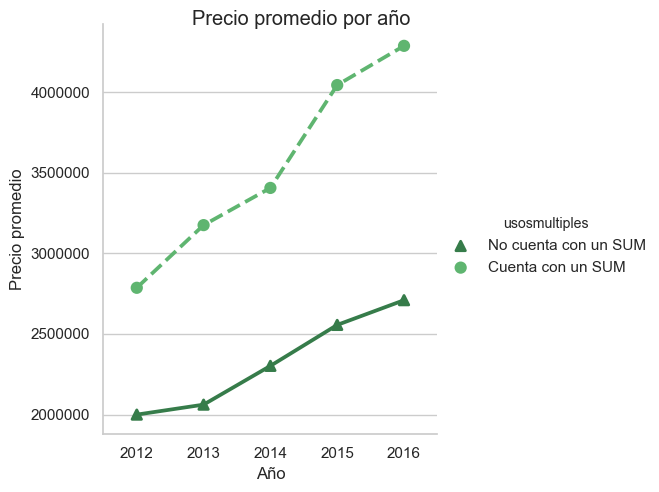

In [58]:
g = sns.catplot(x="Año", y="Precio promedio", hue="usosmultiples", palette=sns.color_palette("Greens_d",2),
                markers=["^", "o"], linestyles=["-", "--"], kind="point", data=avg_por_anio_SUM);
g.fig.suptitle('Precio promedio por año')

#### Tipo de Propiedad

In [59]:
per_SUM = dfZP.loc[dfZP['usosmultiples'] == True]
per_SUM['tipodepropiedad'].value_counts()

Apartamento                6187
Casa                       5099
Casa en condominio         1907
Departamento Compartido      26
Oficina comercial             2
Edificio                      1
Name: tipodepropiedad, dtype: int64

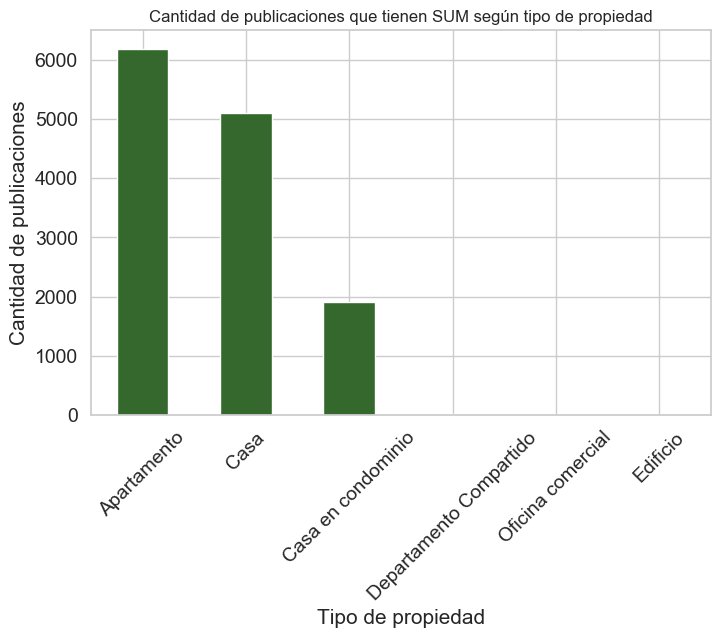

In [60]:
per_SUM['tipodepropiedad'].value_counts().plot(kind='bar',figsize=(8,5),fontsize=14,rot=45, color='#35682d')
plt.title('Cantidad de publicaciones que tienen SUM según tipo de propiedad')
plt.ylabel("Cantidad de publicaciones", size=15)
plt.xlabel("Tipo de propiedad", size=15)
plt.show()

In [61]:
per_no_SUM = dfZP.loc[dfZP['usosmultiples'] == False]
per_no_SUM['tipodepropiedad'].value_counts()

Casa                             136618
Apartamento                       51154
Casa en condominio                17390
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1739
Bodega comercial                   1406
Edificio                           1395
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Otros                               134
Departamento Compartido             115
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [62]:
porcentaje_SUM_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'usosmultiples' : porcentaje}).reset_index()
porcentaje_SUM_gb_tipo
porcentaje_SUM_mayor_a_1 = porcentaje_SUM_gb_tipo.loc[porcentaje_SUM_gb_tipo['usosmultiples'] > 1].\
                           sort_values(['usosmultiples'], ascending=[False])
porcentaje_SUM_mayor_a_1 

,tipodepropiedad,usosmultiples
5,Departamento Compartido,18.44
0,Apartamento,10.79
3,Casa en condominio,9.88
2,Casa,3.60


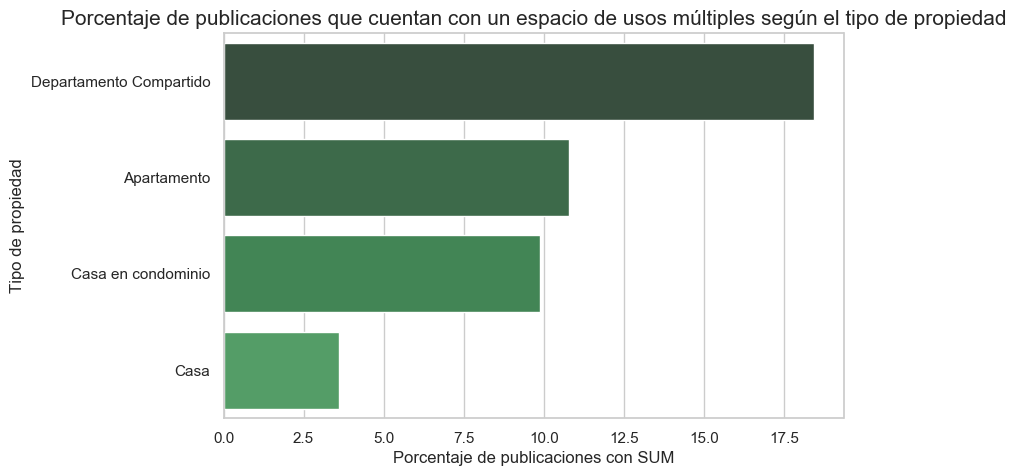

In [63]:
g = sns.barplot(x=porcentaje_SUM_mayor_a_1['usosmultiples'], y=porcentaje_SUM_mayor_a_1['tipodepropiedad'], \
                palette=sns.color_palette("Greens_d"));

g.set_title('Porcentaje de publicaciones que cuentan con un espacio de usos múltiples según el tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Porcentaje de publicaciones con SUM');

#### Ciudad

In [64]:
per_SUM['ciudad'].value_counts()

Huixquilucan              1198
Zapopan                   1054
Querétaro                  843
Alvaro Obregón             809
Benito Juárez              622
Miguel Hidalgo             607
Naucalpan de Juárez        574
San Andrés Cholula         540
Cuajimalpa de Morelos      530
Atizapán de Zaragoza       420
Tlajomulco de Zúñiga       408
Cuauhtémoc                 364
Tlalpan                    354
Acapulco de Juárez         344
Cancún                     306
Coyoacán                   237
Monterrey                  236
Metepec                    215
Guadalajara                200
Corregidora                167
Tlalnepantla de Baz        164
Puebla                     142
San Pedro Garza García     120
Cuernavaca                 120
Mérida                     113
Azcapotzalco               108
Cuautitlán Izcalli         100
El Marqués                  99
Pachuca                     98
La Magdalena Contreras      93
                          ... 
Panotla                      1
Atlacomu

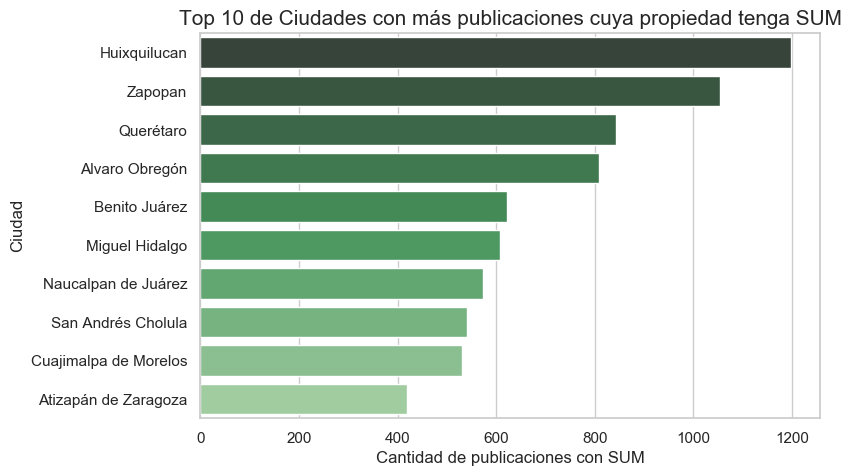

In [65]:
g = sns.barplot(y=per_SUM['ciudad'].value_counts().head(10).index, x=per_SUM['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Greens_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones cuya propiedad tenga SUM', fontsize=15);
g.set_xlabel('Cantidad de publicaciones con SUM');
g.set_ylabel('Ciudad');

In [66]:
porcentaje_SUM_gb_ciudad = dfZP.groupby('ciudad').agg({'usosmultiples' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_SUM_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_SUM_gb_ciudad.columns.get_level_values(1)
porcentaje_SUM_gb_ciudad.columns = level0 + '_' + level1
porcentaje_SUM_gb_ciudad_top10 = porcentaje_SUM_gb_ciudad.loc[porcentaje_SUM_gb_ciudad['usosmultiples_sum'] >= 10].\
    sort_values(['usosmultiples_porcentaje'], ascending=[False]).head(10)
porcentaje_SUM_gb_ciudad_top10

,ciudad_,usosmultiples_porcentaje,usosmultiples_sum
310,Huixquilucan,20.95,1198.0
105,Calimaya,17.75,41.0
206,Cuajimalpa de Morelos,17.55,530.0
555,San Andrés Cholula,14.19,540.0
6,Acapulco de Juárez,14.02,344.0
858,Zihuatanejo de Azueta,13.19,19.0
745,Tlajomulco de Zúñiga,12.54,408.0
37,Alvaro Obregón,12.20,809.0
245,El Marqués,11.55,99.0
411,Metepec,10.77,215.0


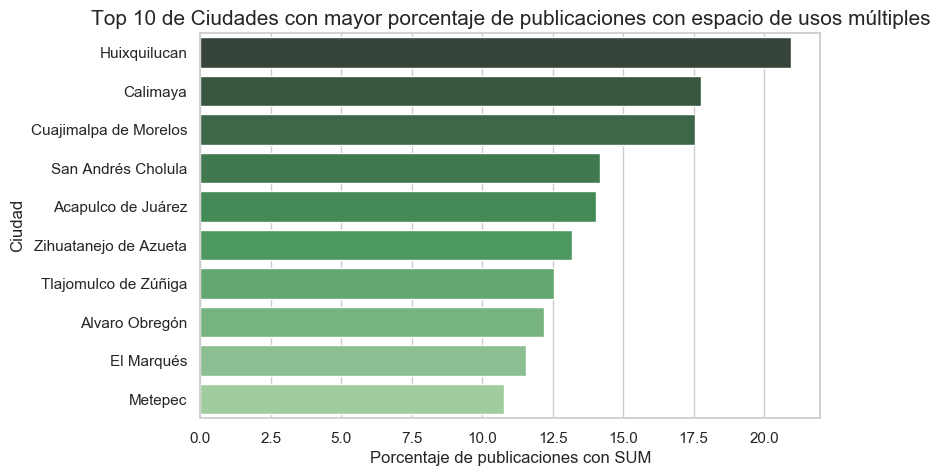

In [67]:
g = sns.barplot(y=porcentaje_SUM_gb_ciudad_top10['ciudad_'], x=porcentaje_SUM_gb_ciudad_top10['usosmultiples_porcentaje'], \
                palette=sns.color_palette("Greens_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones con espacio de usos múltiples', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones con SUM');
g.set_ylabel('Ciudad');

#### Antiguedad

In [68]:
SUM_antiguedad = dfZP.dropna(subset=['antiguedad']).pivot_table(index='antiguedad', columns='usosmultiples', values='precio', aggfunc=np.size)
SUM_antiguedad.fillna({True: 0, False: 0}, inplace=True)
SUM_antiguedad

usosmultiples,False,True
antiguedad,,
0.0,45768.0,4567.0
1.0,11498.0,855.0
2.0,4561.0,498.0
3.0,4966.0,650.0
4.0,7126.0,818.0
5.0,31004.0,2264.0
6.0,3031.0,138.0
7.0,1944.0,102.0
8.0,2325.0,93.0


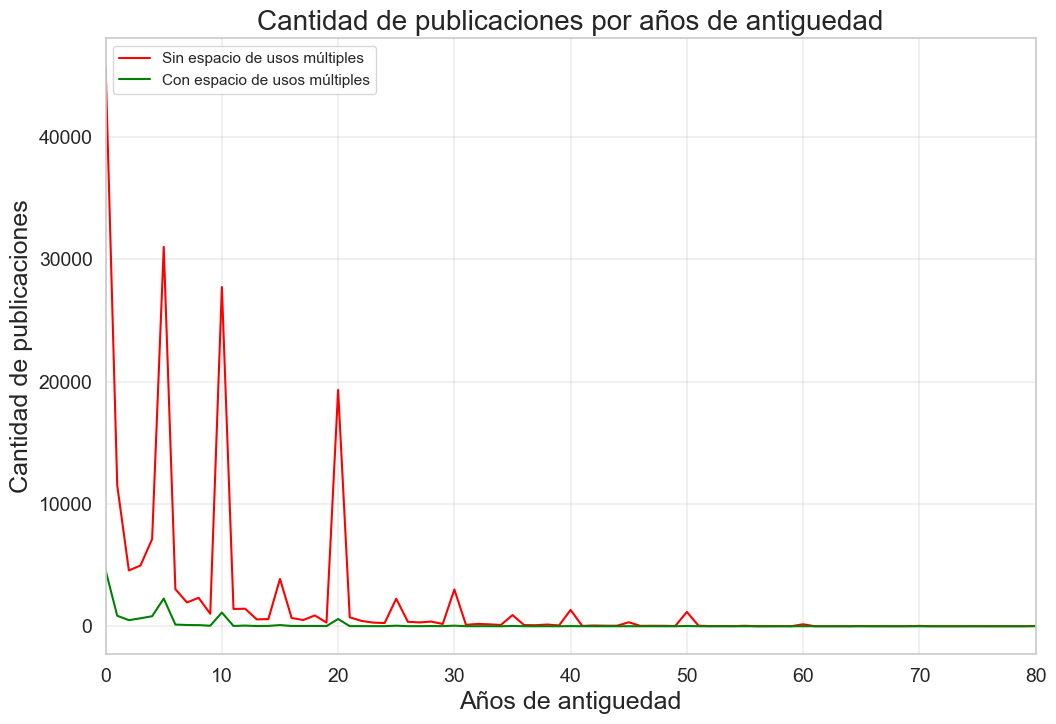

In [69]:
SUM_antiguedad.plot(rot=0,figsize=(12,8),color=['Red','Green'], fontsize=14,x_compat=True)
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Cantidad de publicaciones por años de antiguedad',fontsize=20);
plt.ylabel('Cantidad de publicaciones',fontsize=18);
plt.xlabel('Años de antiguedad',fontsize=18);
plt.legend(['Sin espacio de usos múltiples', 'Con espacio de usos múltiples'], loc='upper left');

plt.show()

### Cantidad total de Amenities

In [70]:
dfZP['cantidad_amenities'].value_counts()

0.0    206412
1.0     22315
2.0      6946
3.0      4327
Name: cantidad_amenities, dtype: int64

#### Cantidad de publicaciones

In [71]:
serie_publicacion_per_cant_amenities = dfZP['cantidad_amenities'].value_counts()
df_publicacion_per_cant_amenities = serie_publicacion_per_cant_amenities.reset_index()
df_publicacion_per_cant_amenities.rename(columns={'index': 'cantidad_amenities','cantidad_amenities': 'total'}, inplace=True)
df_publicacion_per_cant_amenities

,cantidad_amenities,total
0,0.0,206412
1,1.0,22315
2,2.0,6946
3,3.0,4327


In [72]:
df_publicacion_per_cant_amenities['cantidad_amenities'] = df_publicacion_per_cant_amenities['cantidad_amenities'].\
    map({0: 'Sin Amenities',1: 'Un Amenity',2: 'Dos Amenities',3: 'Tres Amenities'})
df_publicacion_per_cant_amenities

,cantidad_amenities,total
0,Sin Amenities,206412
1,Un Amenity,22315
2,Dos Amenities,6946
3,Tres Amenities,4327


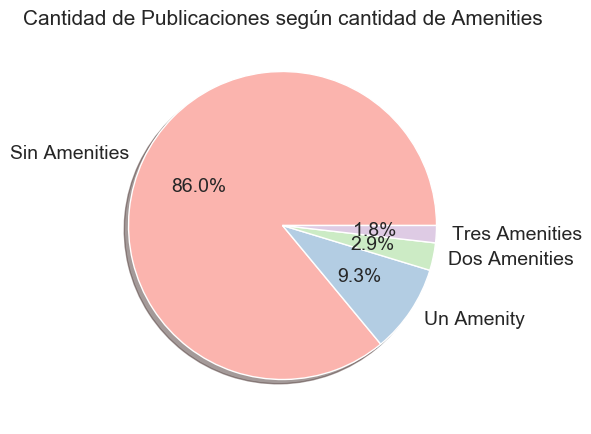

In [73]:
paired_colors = sns.color_palette("Pastel1", 4)

fig, ax = plt.subplots(figsize=(8, 5))

plt.pie(df_publicacion_per_cant_amenities['total'], textprops={'fontsize': 14}, \
        colors=paired_colors, labels=df_publicacion_per_cant_amenities['cantidad_amenities'], \
        autopct='%1.1f%%', counterclock=True, shadow=True)
plt.title('Cantidad de Publicaciones según cantidad de Amenities', fontsize=15)
plt.show()

#### Precio promedio

In [74]:
avg_cantidad_amenities = dfZP.groupby('cantidad_amenities').agg({'precio' : 'mean'}).reset_index()
avg_cantidad_amenities

,cantidad_amenities,precio
0,0.0,2.398349e+06
1,1.0,3.000142e+06
2,2.0,3.721913e+06
3,3.0,4.518758e+06


In [75]:
avg_por_anio_cant_am = dfZP.groupby(['cantidad_amenities', 'year']).agg({'precio': 'mean', 'id': np.size}).reset_index()
avg_por_anio_cant_am.rename(columns={'id': 'cantidad', 'year': 'Año', 'precio': 'Precio promedio'}, inplace=True)
avg_por_anio_cant_am = avg_por_anio_cant_am.loc[avg_por_anio_cant_am['cantidad'] >= 10]
avg_por_anio_cant_am['cantidad_amenities'] = avg_por_anio_cant_am['cantidad_amenities'].\
    map({0: 'Sin Amenities',1: 'Un Amenity',2: 'Dos Amenities',3: 'Tres Amenities'})

avg_por_anio_cant_am

,cantidad_amenities,Año,Precio promedio,cantidad
0,Sin Amenities,2012,1.931282e+06,20088
1,Sin Amenities,2013,2.014306e+06,26314
2,Sin Amenities,2014,2.260910e+06,35696
3,Sin Amenities,2015,2.515261e+06,45914
4,Sin Amenities,2016,2.641031e+06,78400
5,Un Amenity,2012,2.517621e+06,2587
6,Un Amenity,2013,2.586534e+06,2812
7,Un Amenity,2014,2.860667e+06,3241
8,Un Amenity,2015,3.218399e+06,3362
9,Un Amenity,2016,3.206638e+06,10313


Text(0.5, 0.98, 'Precio promedio por año')

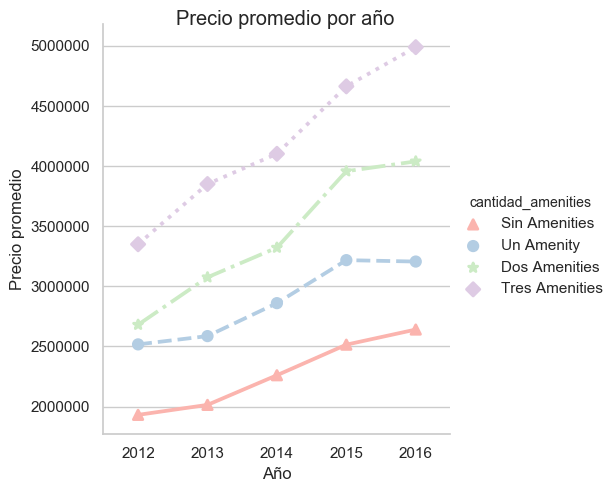

In [76]:
g = sns.catplot(x="Año", y="Precio promedio", hue="cantidad_amenities", palette=sns.color_palette("Pastel1", 4),
                markers=["^", "o", "*", u'D'], linestyles=["-", "--", "-.", ":"], kind="point", data=avg_por_anio_cant_am);
g.fig.suptitle('Precio promedio por año')

## Otros Servicios

### Escuelas Cercanas

In [77]:
dfZP['escuelascercanas'].isnull().sum()

0

In [78]:
dfZP['escuelascercanas'].value_counts()

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [79]:
dfZP['escuelascercanas'] = dfZP['escuelascercanas'].astype(bool)
dfZP['escuelascercanas'].value_counts()

False    133406
True     106594
Name: escuelascercanas, dtype: int64

#### Cantidad de publicaciones

In [80]:
serie_publicacion_per_escuelas = dfZP['escuelascercanas'].value_counts()
df_publicacion_per_escuelas = serie_publicacion_per_escuelas.reset_index()
df_publicacion_per_escuelas.rename(columns={'index': 'escuelascercanas','escuelascercanas': 'total'}, inplace=True)
df_publicacion_per_escuelas

,escuelascercanas,total
0,False,133406
1,True,106594


In [81]:
df_publicacion_per_escuelas['escuelascercanas'] = df_publicacion_per_escuelas['escuelascercanas'].\
    map({False: 'No hay escuelas cercanas', True: 'Hay escuelas cercanas'})
df_publicacion_per_escuelas

,escuelascercanas,total
0,No hay escuelas cercanas,133406
1,Hay escuelas cercanas,106594


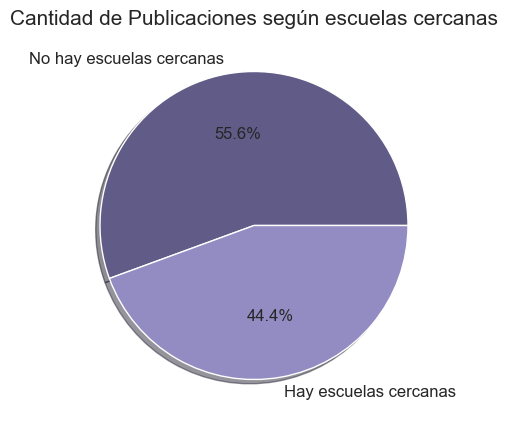

In [82]:
paired_colors = sns.color_palette("Purples_d", 2)

fig, ax = plt.subplots(figsize=(8, 5))

plt.pie(df_publicacion_per_escuelas['total'], textprops={'fontsize': 12}, \
        colors=paired_colors, labels=df_publicacion_per_escuelas['escuelascercanas'], \
        autopct='%1.1f%%', counterclock=True, shadow=True)
plt.title('Cantidad de Publicaciones según escuelas cercanas', fontsize=15)
plt.show()

#### Precio promedio

In [83]:
avgprecio_per_escuelas = dfZP.groupby('escuelascercanas').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_escuelas

precio                      
                          mean         max       min
escuelascercanas                                    
False             2.528554e+06  12525000.0  310000.0
True              2.533698e+06  12521000.0  310000.0

In [84]:
avg_por_anio_escuelas = dfZP.groupby(['escuelascercanas', 'year']).agg({'precio': 'mean', 'id': np.size}).reset_index()
avg_por_anio_escuelas.rename(columns={'id': 'cantidad', 'year': 'Año', 'precio': 'Precio promedio'}, inplace=True)
avg_por_anio_escuelas = avg_por_anio_escuelas.loc[avg_por_anio_escuelas['cantidad'] >= 10]
avg_por_anio_escuelas['escuelascercanas'] = avg_por_anio_escuelas['escuelascercanas'].\
    map({False: 'No hay escuelas cercanas', True: 'Hay escuelas cercanas'})

avg_por_anio_escuelas

,escuelascercanas,Año,Precio promedio,cantidad
0,No hay escuelas cercanas,2012,2.132667e+06,10230
1,No hay escuelas cercanas,2013,2.074953e+06,15195
2,No hay escuelas cercanas,2014,2.372944e+06,23352
3,No hay escuelas cercanas,2015,2.588671e+06,32291
4,No hay escuelas cercanas,2016,2.769964e+06,52338
5,Hay escuelas cercanas,2012,1.955509e+06,13304
6,Hay escuelas cercanas,2013,2.175182e+06,15191
7,Hay escuelas cercanas,2014,2.353272e+06,17220
8,Hay escuelas cercanas,2015,2.711847e+06,19179
9,Hay escuelas cercanas,2016,2.841339e+06,41700


Text(0.5, 0.98, 'Precio promedio por año')

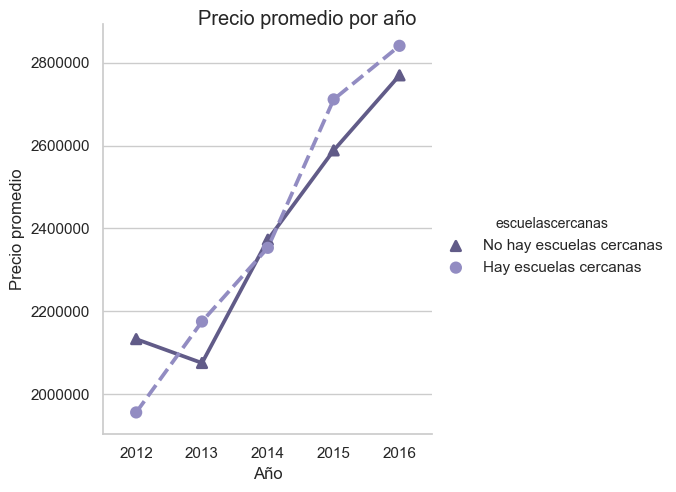

In [85]:
g = sns.catplot(x="Año", y="Precio promedio", hue="escuelascercanas", palette=sns.color_palette("Purples_d",2),
                markers=["^", "o"], linestyles=["-", "--"], kind="point", data=avg_por_anio_escuelas);
g.fig.suptitle('Precio promedio por año')

#### Tipo de Propiedad

In [86]:
per_escuelas = dfZP.loc[dfZP['escuelascercanas'] == True]
per_escuelas['tipodepropiedad'].value_counts()

Casa                             64553
Apartamento                      26315
Casa en condominio                9624
Terreno                           3510
Local Comercial                    700
Edificio                           427
Oficina comercial                  419
Casa uso de suelo                  231
Bodega comercial                   220
Terreno comercial                  189
Inmuebles productivos urbanos       99
Departamento Compartido             86
Villa                               76
Local en centro comercial           67
Quinta Vacacional                   57
Rancho                              15
Duplex                               4
Huerta                               2
Name: tipodepropiedad, dtype: int64

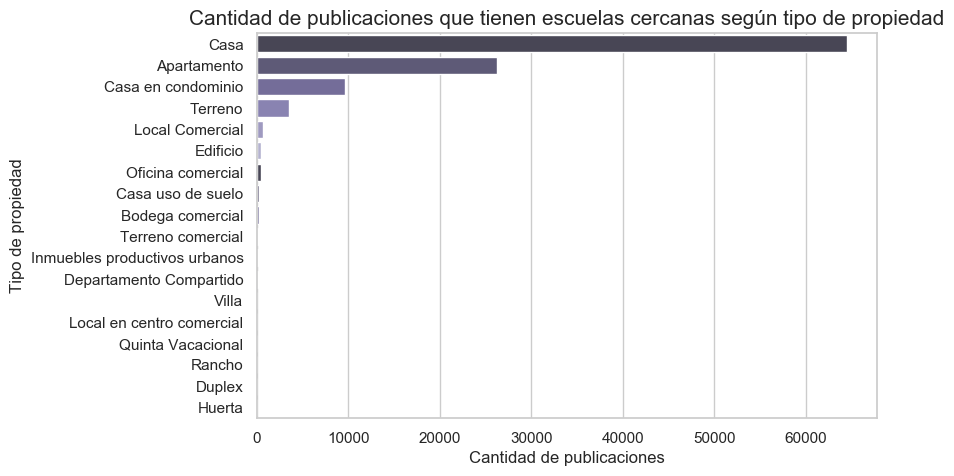

In [87]:
g = sns.barplot(y=per_escuelas['tipodepropiedad'].value_counts().index, x=per_escuelas['tipodepropiedad'].value_counts(), \
                palette=sns.color_palette("Purples_d"));

g.set_title('Cantidad de publicaciones que tienen escuelas cercanas según tipo de propiedad', fontsize=15);
g.set_xlabel('Cantidad de publicaciones');
g.set_ylabel('Tipo de propiedad');

In [88]:
porcentaje_escuelas_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'escuelascercanas' : porcentaje}).reset_index()
porcentaje_escuelas_gb_tipo

,tipodepropiedad,escuelascercanas
0,Apartamento,45.89
1,Bodega comercial,15.65
2,Casa,45.55
3,Casa en condominio,49.87
4,Casa uso de suelo,32.63
5,Departamento Compartido,60.99
6,Duplex,1.17
7,Edificio,30.59
8,Garage,0.00
9,Hospedaje,0.00


In [89]:
porcentaje_escuelas_mayor_a_1 = porcentaje_escuelas_gb_tipo.loc[porcentaje_escuelas_gb_tipo['escuelascercanas'] > 1]
porcentaje_escuelas_mayor_a_1 = porcentaje_escuelas_mayor_a_1.sort_values(['escuelascercanas'], ascending=[False])
porcentaje_escuelas_mayor_a_1

,tipodepropiedad,escuelascercanas
5,Departamento Compartido,60.99
3,Casa en condominio,49.87
11,Inmuebles productivos urbanos,49.50
0,Apartamento,45.89
2,Casa,45.55
13,Local en centro comercial,40.61
20,Terreno,35.29
4,Casa uso de suelo,32.63
7,Edificio,30.59
16,Oficina comercial,24.07


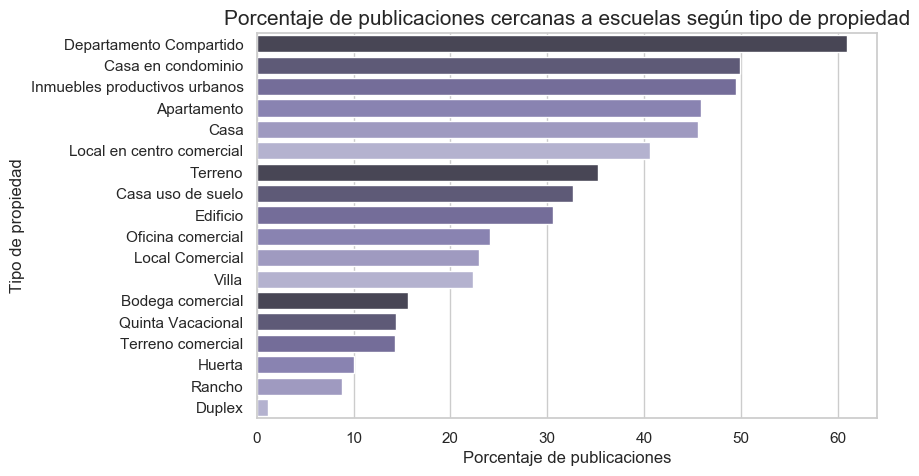

In [90]:
g = sns.barplot(y=porcentaje_escuelas_mayor_a_1['tipodepropiedad'], x=porcentaje_escuelas_mayor_a_1['escuelascercanas'], \
                palette=sns.color_palette("Purples_d"));

g.set_title('Porcentaje de publicaciones cercanas a escuelas según tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Porcentaje de publicaciones');

#### Ciudad

In [91]:
per_escuelas['ciudad'].value_counts()

Querétaro                       5941
Benito Juárez                   5297
Zapopan                         4959
Naucalpan de Juárez             3833
Atizapán de Zaragoza            3245
Alvaro Obregón                  3162
Mérida                          2975
Tlalpan                         2926
Cuauhtémoc                      2837
Huixquilucan                    2751
Coyoacán                        2715
Miguel Hidalgo                  2595
Puebla                          2292
Monterrey                       2124
San Andrés Cholula              2003
Cuautitlán Izcalli              1941
Tlalnepantla de Baz             1870
Guadalajara                     1781
Cancún                          1746
Cuajimalpa de Morelos           1627
Tlajomulco de Zúñiga            1621
Gustavo A. Madero               1498
Iztapalapa                      1491
Cuernavaca                      1364
San Luis Potosí                 1346
Tijuana                         1319
Toluca                          1247
C

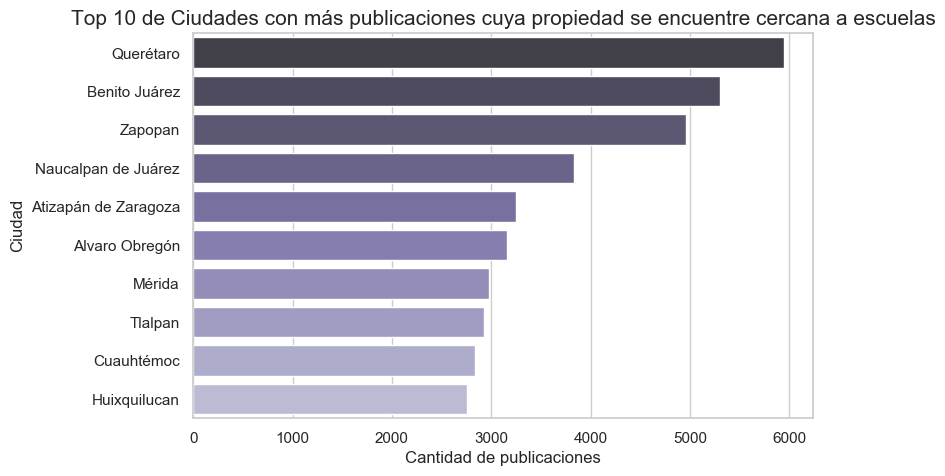

In [92]:
g = sns.barplot(y=per_escuelas['ciudad'].value_counts().head(10).index, x=per_escuelas['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Purples_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones cuya propiedad se encuentre cercana a escuelas', fontsize=15);
g.set_xlabel('Cantidad de publicaciones');
g.set_ylabel('Ciudad');

In [93]:
porcentaje_escuelas_gb_ciudad = dfZP.groupby('ciudad').agg({'escuelascercanas' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_escuelas_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_escuelas_gb_ciudad.columns.get_level_values(1)
porcentaje_escuelas_gb_ciudad.columns = level0 + '_' + level1
porcentaje_escuelas_gb_ciudad_top10 = porcentaje_escuelas_gb_ciudad.loc[porcentaje_escuelas_gb_ciudad['escuelascercanas_sum'] >= 10].\
    sort_values(['escuelascercanas_porcentaje'], ascending=[False]).head(10)
porcentaje_escuelas_gb_ciudad_top10

,ciudad_,escuelascercanas_porcentaje,escuelascercanas_sum
606,San Pedro Mixtepec -Dto. 22 -,90.91,10.0
833,Xonacatlán,86.67,13.0
740,Tizayuca,75.11,166.0
427,Monclova,73.53,25.0
304,Huejotzingo,71.43,10.0
697,Tenango del Valle,70.59,24.0
303,Huehuetoca,69.38,290.0
868,otra,68.18,15.0
413,Mexicaltzingo,68.00,17.0
867,Zumpango,67.79,141.0


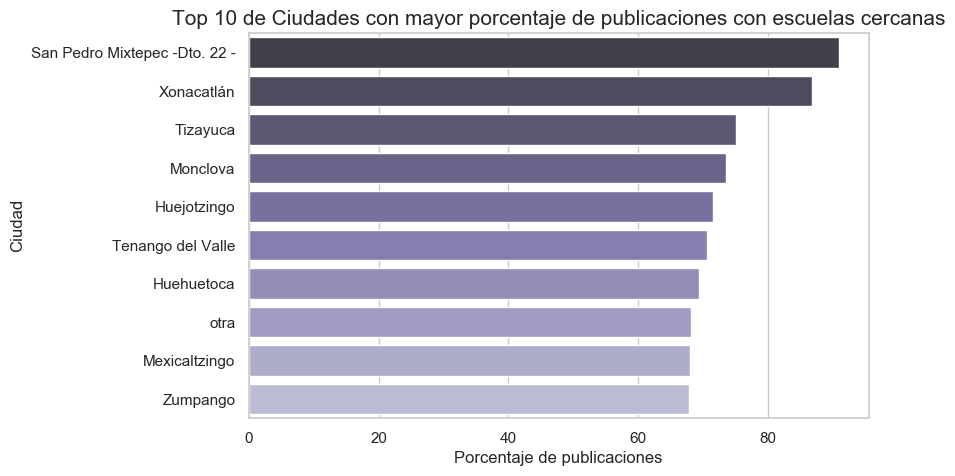

In [94]:
g = sns.barplot(y=porcentaje_escuelas_gb_ciudad_top10['ciudad_'], x=porcentaje_escuelas_gb_ciudad_top10['escuelascercanas_porcentaje'], \
                palette=sns.color_palette("Purples_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones con escuelas cercanas', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones');
g.set_ylabel('Ciudad');

### Centros Comerciales Cercanos

In [95]:
dfZP['centroscomercialescercanos'].isnull().sum()

0

In [96]:
dfZP['centroscomercialescercanos'].value_counts()

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [97]:
dfZP['centroscomercialescercanos'] = dfZP['centroscomercialescercanos'].astype(bool)
dfZP['centroscomercialescercanos'].value_counts()

False    144832
True      95168
Name: centroscomercialescercanos, dtype: int64

#### Cantidad de publicaciones

In [98]:
serie_publicacion_per_centros = dfZP['centroscomercialescercanos'].value_counts()
df_publicacion_per_centros = serie_publicacion_per_centros.reset_index()
df_publicacion_per_centros.rename(columns={'index': 'centroscomercialescercanos','centroscomercialescercanos': 'total'}, inplace=True)
df_publicacion_per_centros

,centroscomercialescercanos,total
0,False,144832
1,True,95168


In [99]:
df_publicacion_per_centros['centroscomercialescercanos'] = df_publicacion_per_centros['centroscomercialescercanos'].\
    map({False: 'Sin Centros Comerciales Cercanos', True: 'Con Centros Comerciales Cercanos'})
df_publicacion_per_centros

,centroscomercialescercanos,total
0,Sin Centros Comerciales Cercanos,144832
1,Con Centros Comerciales Cercanos,95168


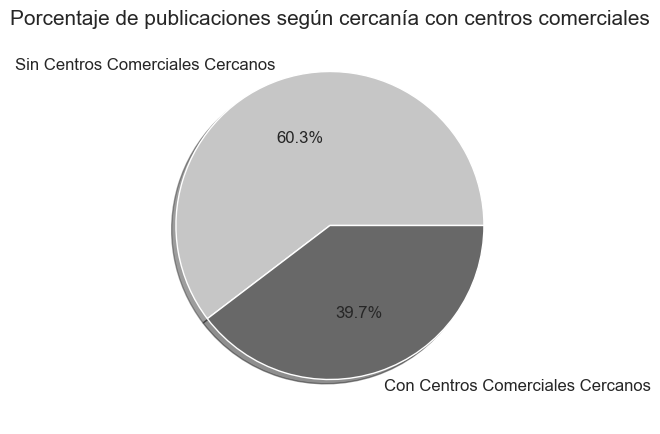

In [100]:
paired_colors = sns.color_palette("Greys", 2)

fig, ax = plt.subplots(figsize=(8, 5))

plt.pie(df_publicacion_per_centros['total'], textprops={'fontsize': 12}, \
        colors=paired_colors, labels=df_publicacion_per_centros['centroscomercialescercanos'], \
        autopct='%1.1f%%', counterclock=True, shadow=True)
plt.title('Porcentaje de publicaciones según cercanía con centros comerciales', fontsize=15)
plt.show()

#### Precio promedio

In [101]:
avgprecio_per_centros = dfZP.groupby('centroscomercialescercanos').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_centros

precio                      
                                    mean         max       min
centroscomercialescercanos                                    
False                       2.481760e+06  12525000.0  310000.0
True                        2.605529e+06  12521000.0  310000.0

In [102]:
avg_por_anio_centro = dfZP.groupby(['centroscomercialescercanos', 'year']).agg({'precio': 'mean', 'id': np.size}).reset_index()
avg_por_anio_centro.rename(columns={'id': 'cantidad', 'year': 'Año', 'precio': 'Precio promedio'}, inplace=True)
avg_por_anio_centro = avg_por_anio_centro.loc[avg_por_anio_centro['cantidad'] >= 10]
avg_por_anio_centro['centroscomercialescercanos'] = avg_por_anio_centro['centroscomercialescercanos'].\
    map({False: 'No tiene centros comerciales cercanos', True: 'Tiene centros comerciales cercanos'})

avg_por_anio_centro

,centroscomercialescercanos,Año,Precio promedio,cantidad
0,No tiene centros comerciales cercanos,2012,2.145633e+06,13961
1,No tiene centros comerciales cercanos,2013,2.087572e+06,18083
2,No tiene centros comerciales cercanos,2014,2.355731e+06,24526
3,No tiene centros comerciales cercanos,2015,2.553713e+06,32390
4,No tiene centros comerciales cercanos,2016,2.706938e+06,55872
5,Tiene centros comerciales cercanos,2012,1.867553e+06,9573
6,Tiene centros comerciales cercanos,2013,2.180162e+06,12303
7,Tiene centros comerciales cercanos,2014,2.378142e+06,16046
8,Tiene centros comerciales cercanos,2015,2.771832e+06,19080
9,Tiene centros comerciales cercanos,2016,2.940212e+06,38166


Text(0.5, 0.98, 'Precio promedio por año')

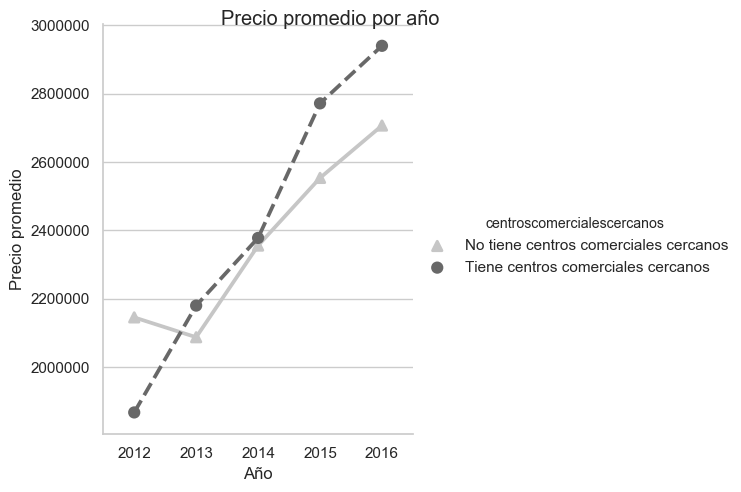

In [103]:
g = sns.catplot(x="Año", y="Precio promedio", hue="centroscomercialescercanos", palette=sns.color_palette("Greys",2),
                markers=["^", "o"], linestyles=["-", "--"], kind="point", data=avg_por_anio_centro);
g.fig.suptitle('Precio promedio por año')

#### Tipo de Propiedad

In [104]:
per_centros = dfZP.loc[dfZP['centroscomercialescercanos'] == True]
per_centros['tipodepropiedad'].value_counts()

Casa                             54641
Apartamento                      25852
Casa en condominio                8869
Terreno                           3075
Local Comercial                    732
Oficina comercial                  508
Edificio                           438
Bodega comercial                   237
Casa uso de suelo                  224
Terreno comercial                  190
Departamento Compartido             94
Inmuebles productivos urbanos       88
Villa                               84
Local en centro comercial           80
Quinta Vacacional                   40
Rancho                              10
Duplex                               3
Huerta                               3
Name: tipodepropiedad, dtype: int64

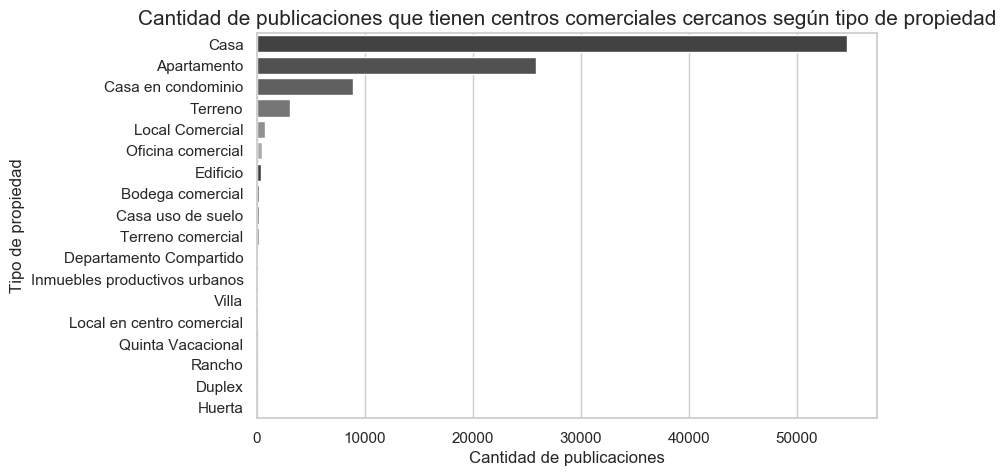

In [105]:
g = sns.barplot(x=per_centros['tipodepropiedad'].value_counts().values, y=per_centros['tipodepropiedad'].value_counts().index, \
                palette=sns.color_palette("Greys_d"));

g.set_title('Cantidad de publicaciones que tienen centros comerciales cercanos según tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Cantidad de publicaciones');

In [106]:
porcentaje_centros_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'centroscomercialescercanos' : porcentaje}).reset_index()
porcentaje_centros_gb_tipo

,tipodepropiedad,centroscomercialescercanos
0,Apartamento,45.08
1,Bodega comercial,16.86
2,Casa,38.56
3,Casa en condominio,45.96
4,Casa uso de suelo,31.64
5,Departamento Compartido,66.67
6,Duplex,0.87
7,Edificio,31.38
8,Garage,0.00
9,Hospedaje,0.00


In [107]:
porcentaje_centros_mayor_a_1 = porcentaje_centros_gb_tipo.loc[porcentaje_centros_gb_tipo['centroscomercialescercanos'] > 1]
porcentaje_centros_mayor_a_1 = porcentaje_centros_mayor_a_1.sort_values(['centroscomercialescercanos'], ascending=[False])
porcentaje_centros_mayor_a_1

,tipodepropiedad,centroscomercialescercanos
5,Departamento Compartido,66.67
13,Local en centro comercial,48.48
3,Casa en condominio,45.96
0,Apartamento,45.08
11,Inmuebles productivos urbanos,44.00
2,Casa,38.56
4,Casa uso de suelo,31.64
7,Edificio,31.38
20,Terreno,30.92
16,Oficina comercial,29.18


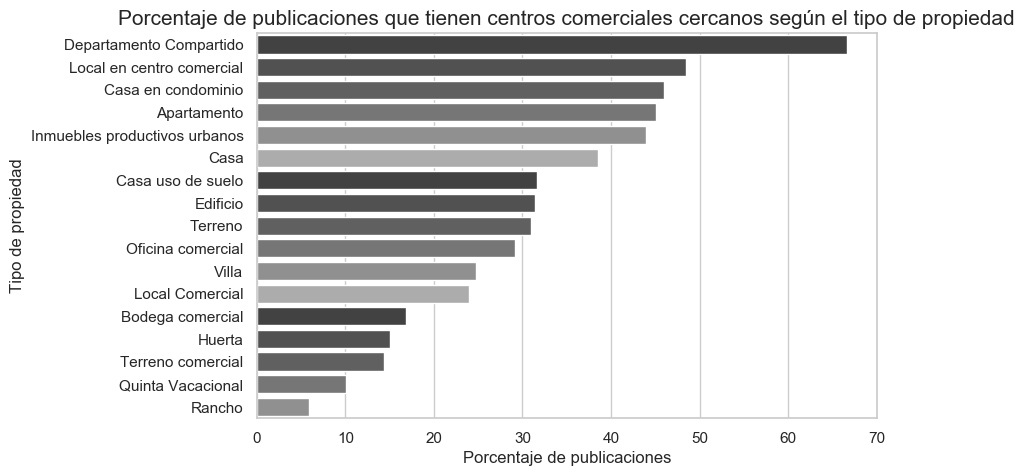

In [108]:
g = sns.barplot(x=porcentaje_centros_mayor_a_1['centroscomercialescercanos'], y=porcentaje_centros_mayor_a_1['tipodepropiedad'], \
                palette=sns.color_palette("Greys_d"));

g.set_title('Porcentaje de publicaciones que tienen centros comerciales cercanos según el tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Porcentaje de publicaciones');

#### Ciudad

In [109]:
per_centros['ciudad'].value_counts()

Benito Juárez                             5264
Querétaro                                 5189
Zapopan                                   5033
Naucalpan de Juárez                       3632
Atizapán de Zaragoza                      3044
Alvaro Obregón                            2914
Cuauhtémoc                                2818
Coyoacán                                  2567
Huixquilucan                              2553
Tlalpan                                   2544
Miguel Hidalgo                            2530
Puebla                                    2212
San Andrés Cholula                        2033
Cuautitlán Izcalli                        1894
Tlalnepantla de Baz                       1788
Guadalajara                               1746
Mérida                                    1741
Tlajomulco de Zúñiga                      1644
Cancún                                    1606
Monterrey                                 1574
Gustavo A. Madero                         1416
Cuajimalpa de

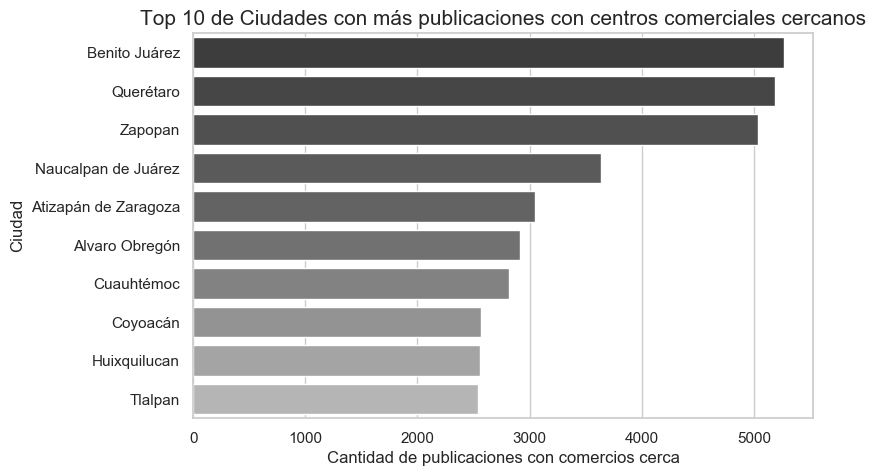

In [110]:
g = sns.barplot(y=per_centros['ciudad'].value_counts().head(10).index, x=per_centros['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Greys_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones con centros comerciales cercanos', fontsize=15);
g.set_xlabel('Cantidad de publicaciones con comercios cerca');
g.set_ylabel('Ciudad');

In [111]:
porcentaje_centros_gb_ciudad = dfZP.groupby('ciudad').agg({'centroscomercialescercanos' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_centros_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_centros_gb_ciudad.columns.get_level_values(1)
porcentaje_centros_gb_ciudad.columns = level0 + '_' + level1
porcentaje_centros_gb_ciudad_top10 = porcentaje_centros_gb_ciudad.loc[porcentaje_centros_gb_ciudad['centroscomercialescercanos_sum'] >= 10].\
    sort_values(['centroscomercialescercanos_porcentaje'], ascending=[False]).head(10)
porcentaje_centros_gb_ciudad_top10

,ciudad_,centroscomercialescercanos_porcentaje,centroscomercialescercanos_sum
833,Xonacatlán,86.67,13.0
413,Mexicaltzingo,84.00,21.0
868,otra,68.18,15.0
858,Zihuatanejo de Azueta,63.89,92.0
322,Ixtapaluca,63.72,332.0
740,Tizayuca,63.35,140.0
303,Huehuetoca,62.44,261.0
867,Zumpango,61.54,128.0
513,Puerto Vallarta,60.70,505.0
409,Melchor Ocampo,60.00,24.0


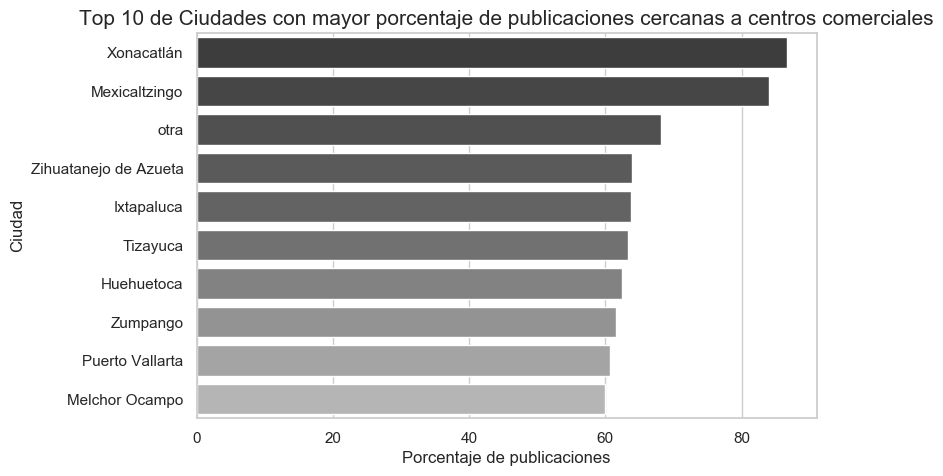

In [112]:
g = sns.barplot(y=porcentaje_centros_gb_ciudad_top10['ciudad_'], x=porcentaje_centros_gb_ciudad_top10['centroscomercialescercanos_porcentaje'], \
                palette=sns.color_palette("Greys_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones cercanas a centros comerciales', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones');
g.set_ylabel('Ciudad');

### Cantidad total de edificaciones cercanas

#### Cantidad de publicaciones

In [113]:
serie_publicacion_per_cant_ed = dfZP['cantidad_cercanos'].value_counts()
df_publicacion_per_cant_ed = serie_publicacion_per_cant_ed.reset_index()
df_publicacion_per_cant_ed.rename(columns={'index': 'cantidad_cercanos','cantidad_cercanos': 'total'}, inplace=True)
df_publicacion_per_cant_ed

,cantidad_cercanos,total
0,0.0,126153
1,2.0,87915
2,1.0,25932


In [114]:
df_publicacion_per_cant_ed['cantidad_cercanos'] = df_publicacion_per_cant_ed['cantidad_cercanos'].\
    map({0: 'No hay cercanía con ningún tipo',1: 'Solo cercana a una edificación',2: 'Escuelas y Centros Comerciales cercanos'})
df_publicacion_per_cant_ed

,cantidad_cercanos,total
0,No hay cercanía con ningún tipo,126153
1,Escuelas y Centros Comerciales cercanos,87915
2,Solo cercana a una edificación,25932


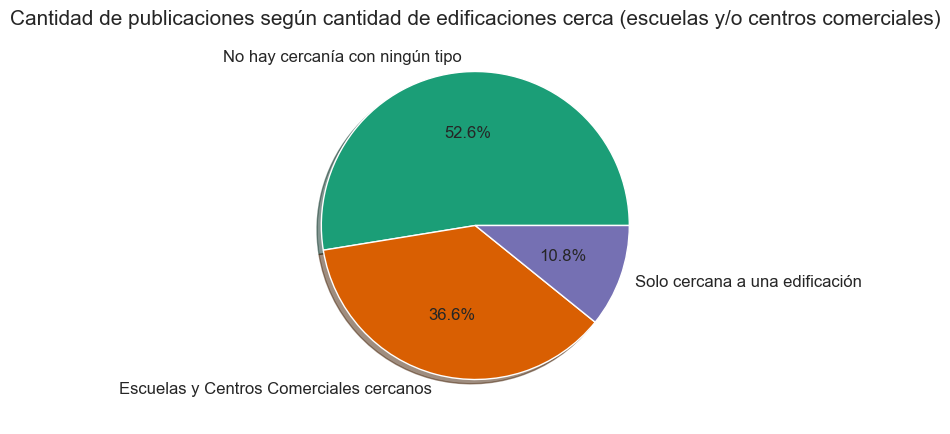

In [115]:
paired_colors = sns.color_palette("Dark2", 3)

fig, ax = plt.subplots(figsize=(8, 5))

plt.pie(df_publicacion_per_cant_ed['total'], textprops={'fontsize': 12}, \
        colors=paired_colors, labels=df_publicacion_per_cant_ed['cantidad_cercanos'], \
        autopct='%1.1f%%', counterclock=True, shadow=True)
plt.title('Cantidad de publicaciones según cantidad de edificaciones cerca (escuelas y/o centros comerciales)', fontsize=15)
plt.show()

#### Precio promedio

In [116]:
avg_por_anio_cant_ed = dfZP.groupby(['cantidad_cercanos', 'year']).agg({'precio': 'mean', 'id': np.size}).reset_index()
avg_por_anio_cant_ed.rename(columns={'id': 'cantidad', 'year': 'Año', 'precio': 'Precio promedio'}, inplace=True)
avg_por_anio_cant_ed = avg_por_anio_cant_ed.loc[avg_por_anio_cant_ed['cantidad'] >= 10]
avg_por_anio_cant_ed['cantidad_cercanos'] = avg_por_anio_cant_ed['cantidad_cercanos'].\
    map({0: 'No hay cercanía con ningún tipo',1: 'Solo cercana a una edificación',2: 'Escuelas y Centros Comerciales cercanos'})

avg_por_anio_cant_ed

,cantidad_cercanos,Año,Precio promedio,cantidad
0,No hay cercanía con ningún tipo,2012,2.151355e+06,9637
1,No hay cercanía con ningún tipo,2013,2.061532e+06,14091
2,No hay cercanía con ningún tipo,2014,2.362165e+06,22158
3,No hay cercanía con ningún tipo,2015,2.564989e+06,30814
4,No hay cercanía con ningún tipo,2016,2.742754e+06,49453
5,Solo cercana a una edificación,2012,2.096225e+06,4917
6,Solo cercana a una edificación,2013,2.193954e+06,5096
7,Solo cercana a una edificación,2014,2.388530e+06,3562
8,Solo cercana a una edificación,2015,2.695846e+06,3053
9,Solo cercana a una edificación,2016,2.680734e+06,9304


Text(0.5, 0.98, 'Precio promedio por año')

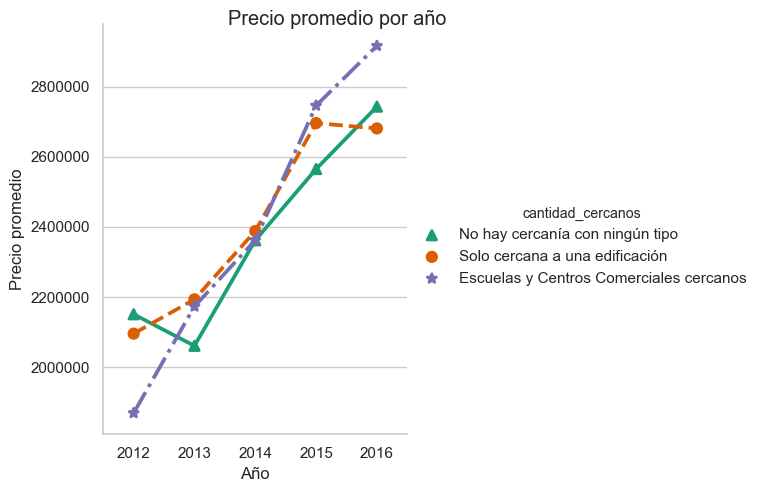

In [117]:
g = sns.catplot(x="Año", y="Precio promedio", hue="cantidad_cercanos", palette=sns.color_palette("Dark2", 3),
                markers=["^", "o", "*"], linestyles=["-", "--", "-."], kind="point", data=avg_por_anio_cant_ed);
g.fig.suptitle('Precio promedio por año')